<div style="text-align: left; background-color:white; font-family: Trebuchet MS; color:black; padding: 12px; line-height:1.25;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 58px;border-style: solid;border-color: black solid;"> IMDB Sentiment Analysis </div>

   <a id='top'></a>
<div class="list-group" id="list-tab" role="tablist"></div>

## <div style="background-color:#B21010;font-family:sans-serif;color:#FFF9ED;font-size:150%;text-align:center;border-radius:9px 9px; padding: 15px; border-style: solid; border-color: black">TABLE OF CONTENTS</div>   
    
* [1. Import Necessaries](#1)
    
* [2. EDA](#2)

    * [2.1. Load dataset](#2.1)    
    * [2.2. Check the shape of the data](#2.2)
    * [2.3. Check the Maximum value of a word index in the datasetss](#2.3)
    * [2.4. Check the Maximum length  of review in dataset](#2.4)
    * [2.5. See some samples of the reviews](#2.5)
    * [2.6.  Plot the distrbution of the reviews labels (Postive or Negative)](#2.6)
    
* [3. Vectorization](#3)
    
* [4. Split the data into train, valid and test](#4)
    
* [5. Build the CNN model architecture](#5)

* [6. Define Early Stop, Compile and Train the model](#6)

* [7. Evaluate the model](#7)

* [8. Plot acc and Loss curve](#8)

* [9. Plot Confussion Matrix](#9)

* [10. Classification report](#10)
       
 


<a id="1"></a>
## <b>1 <span style='color:#B21010'>||</span> Import Nescessaries</b>

In [1]:
import os
from operator import itemgetter    
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import iplot

from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras import models, regularizers, layers, optimizers, losses, metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import imdb
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

import warnings
warnings.filterwarnings('ignore')


colors = ['#494BD3', '#E28AE2', '#F1F481', '#79DB80', '#DF5F5F',
              '#69DADE', '#C2E37D', '#E26580', '#D39F49', '#B96FE3']

<a id="2"></a>
## <b>2 <span style='color:#B21010'>||</span> EDA</b>

<a id="2.1"></a>
### <b>2.1 <span style='color:#B21010'>||</span> Load dataset</b>

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


<a id="2.2"></a>
### <b>2.2 <span style='color:#B21010'>||</span> Check the shape of the data</b>

In [3]:
def shape_of_ds(df, ds_name='df'):
    print(f"Shape of {ds_name} dataset is {df.shape}")
    
def sep(num=100):
    print("_"*num)
    print()

In [4]:
shape_of_ds(train_data, "training")
sep()
shape_of_ds(test_data, "testing")

Shape of training dataset is (25000,)
____________________________________________________________________________________________________

Shape of testing dataset is (25000,)


<a id="2.3"></a>
### <b>2.3 <span style='color:#B21010'>||</span> Check the Maximum value of a word index in the datasets</b>

In [5]:
def max_word_ind(df, ds_name='df'):
    mx_word_ind = max([max(sequence) for sequence in df])
    print(f"Maximum value of a word index in {ds_name} dataset: {mx_word_ind}")

In [6]:
max_word_ind(train_data, "trainig")
sep()
max_word_ind(test_data, "testing")

Maximum value of a word index in trainig dataset: 9999
____________________________________________________________________________________________________

Maximum value of a word index in testing dataset: 9999


**The max value of a word index in both training and testing datasets is 9999 and thats reasonable because when we load the data we defined the num of words to be 10000**

<a id="2.4"></a>
### <b>2.4 <span style='color:#B21010'>||</span> Check the Maximum length  of review in dataset</b>

In [7]:
def max_review(df, ds_name='df'):
    mx_word_ind = max([len(sequence) for sequence in df])
    print(f"Maximum length of a review in {ds_name} dataset: {mx_word_ind}")

In [8]:
max_review(train_data, "trainig")
sep()
max_review(test_data, "testing")

Maximum length of a review in trainig dataset: 2494
____________________________________________________________________________________________________

Maximum length of a review in testing dataset: 2315


<a id="2.5"></a>
### <b>2.5 <span style='color:#B21010'>||</span>see some samples of the reviews</b>

In [9]:
word_index = imdb.get_word_index()

1641221/1641221 [==============================] - 0s 0us/step


**Word index is a dict in which each number is encoded to its corresponding word**

**Lets print the word index for more explaination**

In [11]:
n = 10

for word in word_index:
    n-=1
    print(f"the number {word_index[word]} is the encoding of {word}")
    if not n:
        break

the number 34701 is the encoding of fawn
the number 52006 is the encoding of tsukino
the number 52007 is the encoding of nunnery
the number 16816 is the encoding of sonja
the number 63951 is the encoding of vani
the number 1408 is the encoding of woods
the number 16115 is the encoding of spiders
the number 2345 is the encoding of hanging
the number 2289 is the encoding of woody
the number 52008 is the encoding of trawling


In [12]:
len(word_index)

88584

**So here I print the first 10 encoded words for ex: number 1408 is the encoding of "woods" word and so on and so forth for the rest of 88584 words**

In [13]:
def decoded_review(rev, word_index):
    sentence = ""
    
    for num in rev:
        
        key_list = list(word_index.keys())
        val_list = list(word_index.values())
        word = val_list.index(num)
        
        sentence = sentence + key_list[word] + ' '
    
    print(sentence)

**This is a function to show the actual decoded review by passing the encoded review and the word index to it, so lets see some sample reviews**

In [14]:
print(decoded_review(train_data[0], word_index))

the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other and in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of and odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but when from one bit then have tw

In [15]:
print(decoded_review(train_data[1], word_index))

the thought solid thought senator do making to is spot nomination assumed while he of jack in where picked as getting on was did hands fact characters to always life thrillers not as me can't in at are br of sure your way of little it strongly random to view of love it so principles of guy it used producer of where it of here icon film of outside to don't all unique some like of direction it if out her imagination below keep of queen he diverse to makes this stretch and of solid it thought begins br senator and budget worthwhile though ok and awaiting for ever better were and diverse for budget look kicked any to of making it out and follows for effects show to show cast this family us scenes more it severe making senator to and finds tv tend to of emerged these thing wants but and an beckinsale cult as it is video do you david see scenery it in few those are of ship for with of wild to one is very work dark they don't do dvd with those them 
None


**Keep printing whatever u want :)**

<a id="2.6"></a>
### <b>2.6 <span style='color:#B21010'>||</span> Plot the distrbution of the reviews labels (Postive or Negative)</b>

In [16]:
labels_df = pd.DataFrame(columns=['Training_labels', 'Testing_labels'])
labels_df['Training_labels'] = train_labels
labels_df['Training_labels'].replace([0,1], ['postive', 'negative'], inplace=True)

labels_df['Testing_labels'] = test_labels
labels_df['Testing_labels'].replace([0,1], ['postive', 'negative'], inplace=True)

In [17]:
labels_df.head()

,Training_labels,Testing_labels
0,negative,postive
1,postive,negative
2,postive,negative
3,negative,postive
4,postive,negative


In [18]:
def cat_summary_with_graph(dataframe, col_name):
    fig = make_subplots(rows=1, cols=2,
                        subplot_titles=('Countplot', 'Percentages'),
                        specs=[[{"type": "xy"}, {'type': 'domain'}]])

    fig.add_trace(go.Bar(y=dataframe[col_name].value_counts().values.tolist(),
                         x=[str(i) for i in dataframe[col_name].value_counts().index],
                         text=dataframe[col_name].value_counts().values.tolist(),
                         textfont=dict(size=15),
                         name=col_name,
                         textposition='auto',
                         showlegend=False,
                         marker=dict(color=colors,
                                     line=dict(color='#DBE6EC',
                                               width=1))),
                  row=1, col=1)

    fig.add_trace(go.Pie(labels=dataframe[col_name].value_counts().keys(),
                         values=dataframe[col_name].value_counts().values,
                         textfont=dict(size=20),
                         textposition='auto',
                         showlegend=False,
                         name=col_name,
                         marker=dict(colors=colors)),
                  row=1, col=2)

    fig.update_layout(title={'text': col_name,
                             'y': 0.9,
                             'x': 0.5,
                             'xanchor': 'center',
                             'yanchor': 'top'},
                      template='plotly_white')

    iplot(fig)

In [19]:
cat_summary_with_graph(labels_df, 'Training_labels')
cat_summary_with_graph(labels_df, 'Testing_labels')

**Now we can see the data is perfectly balance**

<a id="3"></a>
## <b>3 <span style='color:#B21010'>||</span> Vectorization</b>

**Encoding the integer sequences into a binary matrix basically one hot encoding**

In [20]:
def vectorize_sequences(sequences, dimension=10000):
    
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [23]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

shape_of_ds(x_train,"x_train")
sep()
shape_of_ds(x_train,"x_train")

Shape of x_train dataset is (25000, 10000)
____________________________________________________________________________________________________

Shape of x_train dataset is (25000, 10000)


**Now we have vectorized our data and it is basically a binary matrix**

In [24]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

**Lets vectorize the labels too**

In [27]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
shape_of_ds(y_train,"y_train")
sep()
shape_of_ds(y_test,"y_test")

Shape of y_train dataset is (25000,)
____________________________________________________________________________________________________

Shape of y_test dataset is (25000,)


<a id="4"></a>
## <b>4 <span style='color:#B21010'>||</span> Split the data into train, valid and test</b>

**here we basically will assign 5k data points from train dataset to valid dataset**

In [29]:
x_val = x_train[:5000]
partial_x_train = x_train[5000:]
y_val = y_train[:5000]
partial_y_train = y_train[5000:]

shape_of_ds(x_val,"x_val")
sep()

shape_of_ds(partial_x_train ,"partial_x_train ")
sep()

shape_of_ds(y_val,"y_val")
sep()

shape_of_ds(partial_y_train,"partial_y_train")
sep()


Shape of x_val dataset is (5000, 10000)
____________________________________________________________________________________________________

Shape of partial_x_train  dataset is (20000, 10000)
____________________________________________________________________________________________________

Shape of y_val dataset is (5000,)
____________________________________________________________________________________________________

Shape of partial_y_train dataset is (20000,)
____________________________________________________________________________________________________



<a id="5"></a>
## <b>5 <span style='color:#B21010'>||</span> Build the CNN model architecture</b>

In [30]:
model = models.Sequential()

model.add(layers.Dense(16, kernel_regularizer=regularizers.l1(0.001), activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, kernel_regularizer=regularizers.l1(0.001),activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                160016    
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


<a id="6"></a>
## <b>6 <span style='color:#B21010'>||</span>Define Early Stop, Compile and Train the model</b>

In [32]:
NumEpochs = 1000
BatchSize = 512

early_stop = EarlyStopping(monitor='val_loss', 
                           patience=10,
                           verbose=1)

checkpoint = ModelCheckpoint('model_weights.h5', 
                             monitor='val_loss', 
                             save_best_only=True, 
                             save_weights_only=True, 
                             mode='min', 
                             verbose=1)

model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['acc'])

history = model.fit(partial_x_train, 
                    partial_y_train, 
                    epochs=NumEpochs, 
                    batch_size=BatchSize, 
                    validation_data=(x_val, y_val),
                    callbacks = [early_stop, checkpoint])

Epoch 1/1000
39/40 [============================>.] - ETA: 0s - loss: 1.3110 - acc: 0.5879
Epoch 1: val_loss improved from inf to 0.77174, saving model to model_weights.h5
40/40 [==============================] - 3s 50ms/step - loss: 1.3101 - acc: 0.5883 - val_loss: 0.7717 - val_acc: 0.8146
Epoch 2/1000
39/40 [============================>.] - ETA: 0s - loss: 0.7372 - acc: 0.7013
Epoch 2: val_loss improved from 0.77174 to 0.64589, saving model to model_weights.h5
40/40 [==============================] - 1s 37ms/step - loss: 0.7371 - acc: 0.7014 - val_loss: 0.6459 - val_acc: 0.8316
Epoch 3/1000
39/40 [============================>.] - ETA: 0s - loss: 0.6742 - acc: 0.7575
Epoch 3: val_loss improved from 0.64589 to 0.59142, saving model to model_weights.h5
40/40 [==============================] - 2s 61ms/step - loss: 0.6742 - acc: 0.7577 - val_loss: 0.5914 - val_acc: 0.8476
Epoch 4/1000
40/40 [==============================] - ETA: 0s - loss: 0.6400 - acc: 0.7951
Epoch 4: val_loss improve

<a id="7"></a>
## <b>7 <span style='color:#B21010'>||</span>Evaluate the model</b>

In [33]:
results = model.evaluate(x_test, y_test)
print("_"*100)
print("Test Loss and Accuracy")
print("results ", results)
history_dict = history.history
history_dict.keys()

782/782 [==============================] - 2s 2ms/step - loss: 0.5638 - acc: 0.8726
____________________________________________________________________________________________________
Test Loss and Accuracy
results  [0.5638095140457153, 0.8726400136947632]


dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

<a id="8"></a>
## <b>8 <span style='color:#B21010'>||</span>Plot acc and Loss curve</b>

In [34]:
def plot_training(hist):
    '''
    This function take training model and plot history of accuracy and losses with the best epoch in both of them.
    '''

    # Define needed variables
    tr_acc = hist.history['acc']
    tr_loss = hist.history['loss']
    val_acc = hist.history['val_acc']
    val_loss = hist.history['val_loss']
    index_loss = np.argmin(val_loss)
    val_lowest = val_loss[index_loss]
    index_acc = np.argmax(val_acc)
    acc_highest = val_acc[index_acc]
    Epochs = [i+1 for i in range(len(tr_acc))]
    loss_label = f'best epoch= {str(index_loss + 1)}'
    acc_label = f'best epoch= {str(index_acc + 1)}'

    # Plot training history
    plt.figure(figsize= (20, 8))
    plt.style.use('fivethirtyeight')

    plt.subplot(1, 2, 1)
    plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
    plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
    plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
    plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
    plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout
    plt.show()

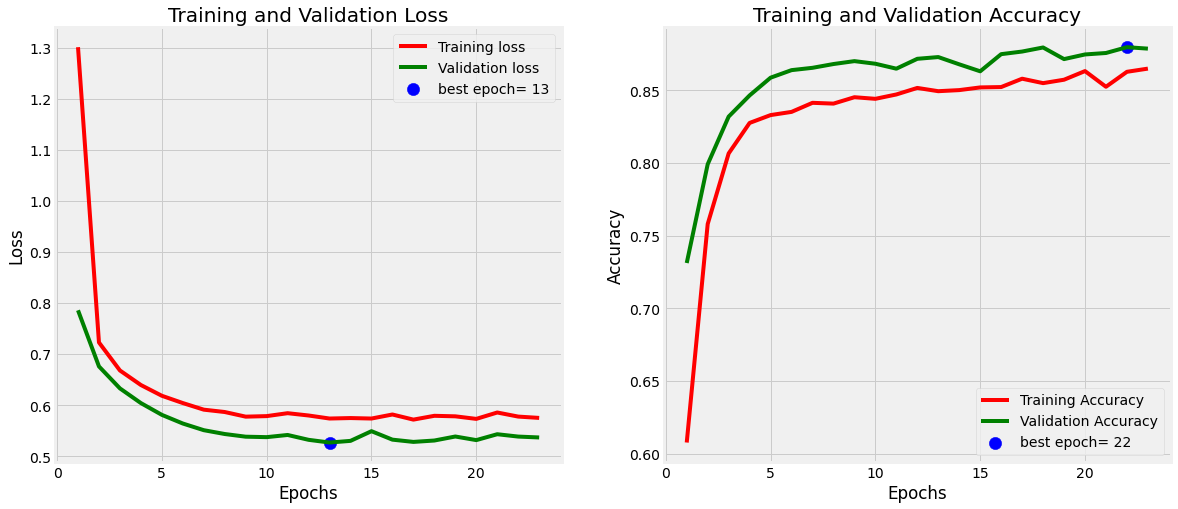

In [ ]:
plot_training(history)

<a id="9"></a>
## <b>9 <span style='color:#B21010'>||</span>Plot Confussion Matrix</b>

In [35]:
y_pred = model.predict(x_test)

y_pred_labels = []

y_true_labels = y_test

782/782 [==============================] - 2s 2ms/step


In [36]:
threshold = 0.5
for pred in y_pred:
    if pred >= 0.5:
        y_pred_labels.append(1)
    else:
        y_pred_labels.append(0)

In [37]:
y_pred_labels[:5]

[0, 1, 1, 1, 1]

In [38]:
y_true_labels[:5]

array([0., 1., 1., 0., 1.], dtype=float32)

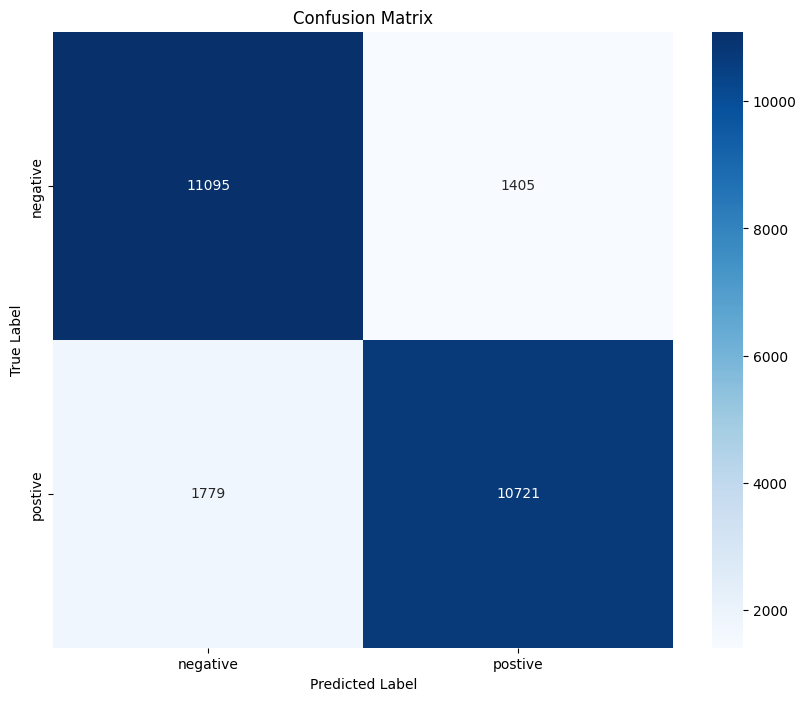

In [39]:
class_names = ['negative', 'postive']

confusion_mtx = confusion_matrix(y_true_labels, y_pred_labels)

plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx, cmap="Blues", annot=True, fmt="d", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

<a id="10"></a>
## <b>10 <span style='color:#B21010'>||</span>Classification Report</b>

In [40]:
print(classification_report(y_true_labels, y_pred_labels, target_names= class_names))

              precision    recall  f1-score   support

    negative       0.86      0.89      0.87     12500
     postive       0.88      0.86      0.87     12500

    accuracy                           0.87     25000
   macro avg       0.87      0.87      0.87     25000
weighted avg       0.87      0.87      0.87     25000

